# Reducción de la dimensionalidad y exploración de datos

Modificación de una libreta del [curso de José Dianes de `code mentor`](https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka).


Ahora vamos a leer el archivo como un `DataFrame` de `Pandas`. Para quienes nunca han usado `Pandas` este es un modulo de *python* que se basa en *numpy* y que trata de replicar las facilidades de tratamiento de datos como tablas que ofrece el lenguaje de programación *R*. Si no tienes experiencia previa en *Pandas* se anexa en los documentos de la tarea una libreta de introducción al uso de *Pandas* que espero sea de utilidad.   

In [49]:
import numpy as np
import pandas as pd

indicadores_df = pd.read_csv('indicadores_bienestar_2014.csv', index_col=0)


In [50]:
indicadores_df.head()

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Entidad,,,,,,,,,,,,,,,,,,,,,
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7


Y vamos a ver un resumen de la informacion que tenemos en el `DataFrame`:

In [51]:
indicadores_df.describe()

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,85.360606,33.524848,89.027273,7.054545,48.139394,6.009091,31.787879,59.093939,78.618182,75.215152,...,41.430303,6.942424,13.375758,57.137576,3.727273,60.381818,10.027273,62.512121,0.957576,70.972727
std,2.909139,10.908865,8.661310,2.965225,9.092852,2.646946,6.857922,7.052789,3.790486,0.944101,...,14.999010,7.034959,6.055319,13.472917,1.117831,3.344160,4.638782,24.068532,0.111888,16.715043
min,77.200000,9.470000,60.200000,1.700000,30.900000,0.910000,18.300000,33.300000,69.800000,73.000000,...,14.200000,0.600000,4.800000,35.430000,2.000000,52.300000,3.400000,1.500000,0.700000,29.800000
25%,84.500000,25.810000,86.800000,4.100000,41.700000,4.360000,27.900000,56.300000,76.000000,74.900000,...,30.600000,2.600000,9.400000,47.700000,3.000000,58.400000,6.800000,44.900000,0.900000,66.700000
50%,85.600000,33.350000,91.600000,7.000000,46.000000,5.610000,31.100000,60.100000,78.900000,75.500000,...,41.900000,4.400000,12.500000,56.890000,3.700000,60.400000,9.100000,67.500000,1.000000,74.800000
75%,87.200000,41.390000,94.700000,9.300000,55.300000,7.240000,37.200000,63.600000,81.600000,75.900000,...,50.600000,7.900000,16.800000,67.330000,4.400000,61.800000,12.200000,80.500000,1.000000,82.700000
max,90.900000,55.100000,98.500000,13.000000,70.900000,13.960000,45.000000,68.400000,85.000000,76.700000,...,77.100000,28.100000,33.400000,82.020000,7.400000,67.300000,26.200000,100.000000,1.200000,94.900000


## Reducción de la dimensionalidad con PCA

Como en este caso lo que nos interesa es poder hacer una exploración de los datos, vamos a usar el análisis en componentes principales como una herramienta para obtener la mejor foto posible de los datos que nos interesan. Por esta razón, solo vamos a utilizar las dos primeras componentes principales.

Para hacer los componentes principales, no los vamos a programar, si no que vamos a utilizar una biblioteca superpoderosa para aprendizaje máquina `Sklearn`. Si bien estas bibliotecas nos facilitan la vida, hay que tener cuidado de entender la documentación y saber que hace cada algoritmo, si no estaríamos como *el burro que toco la flauta*.

Por ejemplo, para hacer el análisis en componentes principales, simplemente tenemos que hacer:

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(indicadores_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [53]:
red_pca = pca.transform(indicadores_df)

Tambien hubieramos podido llamar simplemente `fit_transform` para hacer ambos pasos en uno solo. Ahora vamos a transformar el `ndarray` que obtuvimos en un `DataFrame` de *Pandas* para mantener el formato.

In [54]:
red_pca_df = pd.DataFrame(red_pca)
red_pca_df.index = indicadores_df.index
red_pca_df.columns = ['CP_1','CP_2']
red_pca_df.head()

,CP_1,CP_2
Entidad,,
Estados Unidos Mexicanos,3072.997525,-327.432327
Aguascalientes,5684.100114,329.205638
Baja California,5867.446393,1354.665166
Baja California Sur,-709.550156,1705.456571
Campeche,-5526.493125,1334.427339


La varianza de los datos que explican los dos primeros componentes principales es:

In [55]:
print(pca.explained_variance_ratio_) 

[ 0.95210537  0.04785766]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?

Podemos ver que el primer componente principal explica una varianza muy alta del 95.2% mientras que el segundo solo el 4.7% 
pero al sumarlos obtenemos un 99% lo cual explica una varianza muy alta y bastante aceptable de los datos

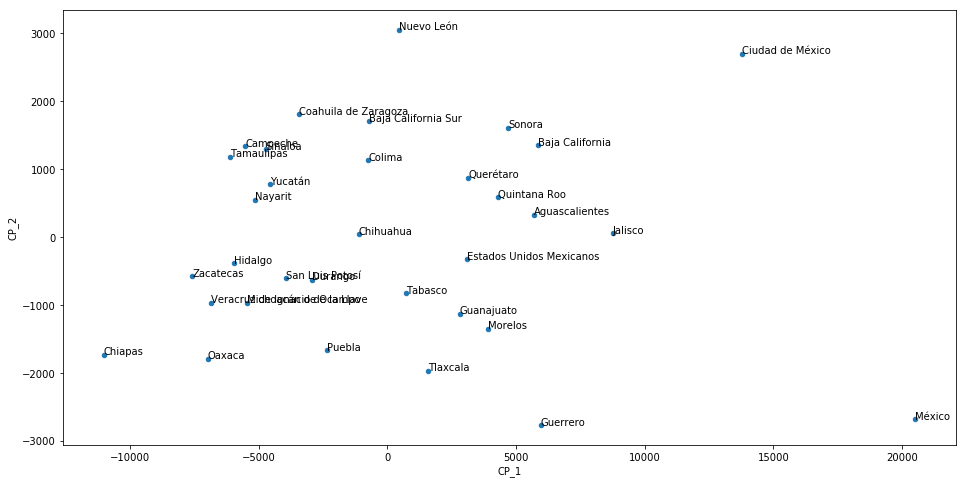

In [56]:
%matplotlib inline

ax = red_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(red_pca_df.index):
    ax.annotate(pais, (red_pca_df.iloc[i].CP_1, red_pca_df.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los estados a lo largo del eje `CP_1` explica mejor las diferencias entre los estados.  

## Buscando similitudes entre paises usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vaos a utilizar una técnica semi automátixzada llamada *el método del codo*, en la cuálse calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 


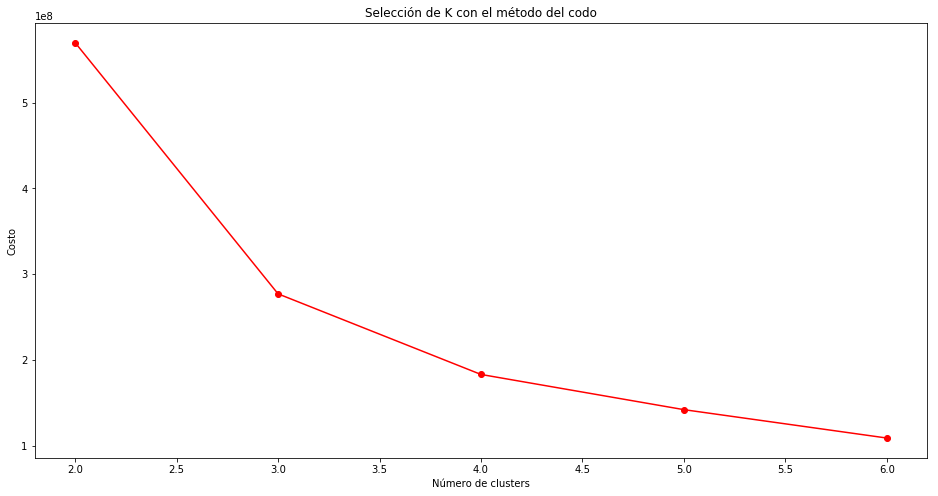

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(indicadores_df)
    costos.append(-kmeans.score(indicadores_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')


En el caso particular que yo tome (cada caso al repetirse es diferente) me encuentro con dos codos, uno en 3 y unos en 4, pero el de 4 es mñas pronunciado, así que me quedo con ese.

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?  en 3

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

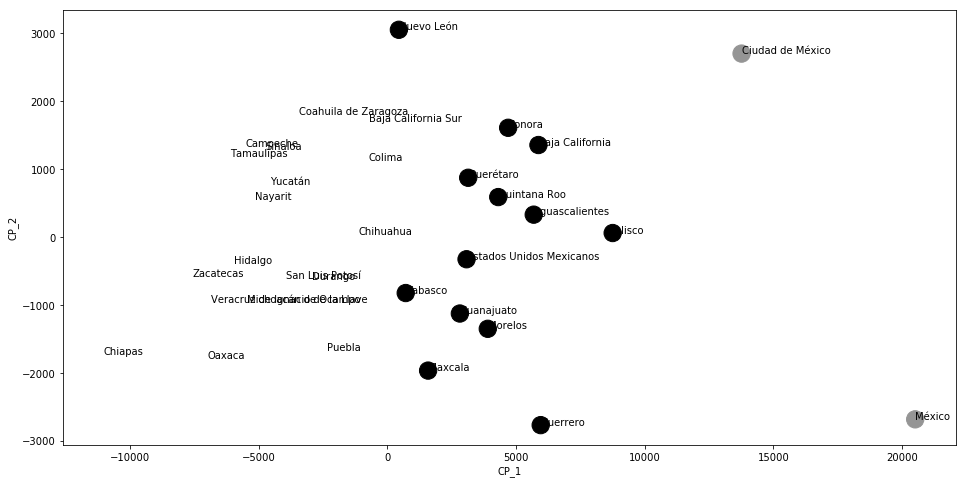

In [58]:
K = 3
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(indicadores_df)
red_pca_df['grupos'] = pd.Series(clusters.labels_, index=red_pca_df.index)


ax = red_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=red_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(red_pca_df.index):
    ax.annotate(pais, (red_pca_df.iloc[i].CP_1, red_pca_df.iloc[i].CP_2))


Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de paises.

In [59]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = indicadores_df.columns
prototipos_df.index.names = ['Protopipo']
prototipos_df.columns.names = ['indicador']

prototipos_df

indicador,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Protopipo,,,,,,,,,,,,,,,,,,,,,
P1,85.738889,29.743333,87.388889,7.483333,47.950000,7.150000,33.961111,61.777778,78.177778,75.072222,...,44.600000,8.188889,14.677778,59.817222,3.416667,60.438889,8.433333,55.694444,0.944444,67.200000
P2,82.300000,43.185000,95.300000,3.350000,47.350000,1.415000,20.500000,39.650000,72.150000,75.800000,...,37.750000,3.950000,13.650000,52.360000,5.100000,60.300000,15.400000,78.750000,1.100000,86.650000
P3,85.307692,37.274615,90.330769,7.030769,48.523077,5.136154,30.515385,58.369231,80.223077,75.323077,...,37.607692,5.676923,11.530769,54.162308,3.946154,60.315385,11.407692,69.453846,0.953846,73.784615


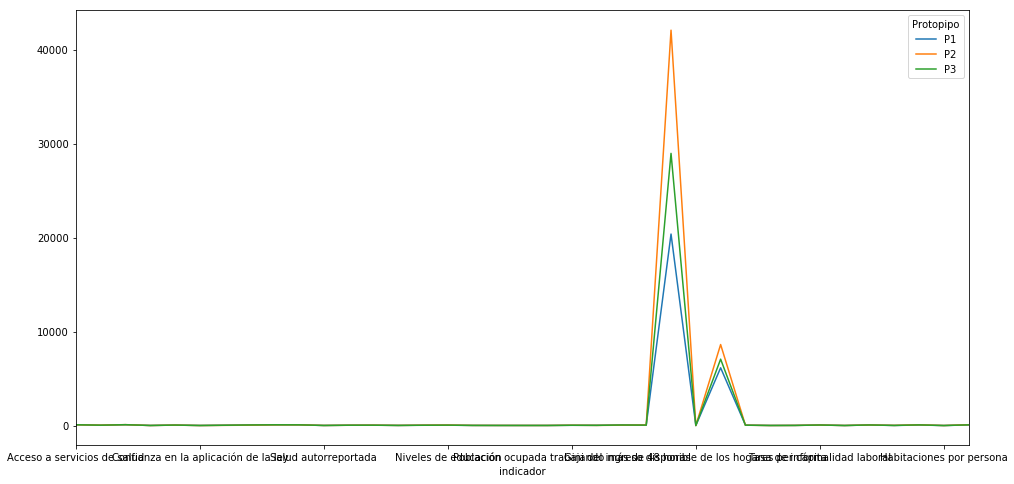

In [60]:
prototipos_df.T.plot(figsize=(16,8))

#### Conclusiones

Vemos tres prototipos bien definidos en los que se agrupan los que tienen los valores mas altos en casi todos sus indicadores, asi como otro en donde estan los que tienen valores medios y por ultimo los que tiene los valores mas bajos en casi todos los indicadores, los picos mostrados en la grafica es por la medicion de los indicadores en donde la taza delictiva son numeros muy altos.